In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
df5 = pd.read_csv('df5_low.csv')
df5

,Unnamed: 0,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,6,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,7,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,18,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,20396,249000.0,1260,1125,2.0,0.0,0.0,810,450.0,2011,0.0,98106,1260,1172,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4375,20404,305000.0,1590,2656,2.0,0.0,0.0,1220,370.0,2009,0.0,98106,1590,2306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4376,20415,230000.0,1140,1201,2.0,0.0,0.0,1140,0.0,2014,0.0,98108,1210,1552,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4377,20427,270000.0,1870,5000,2.0,0.0,0.0,1870,0.0,2009,0.0,98042,2170,5399,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df['bedrooms'] == 33

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: bedrooms, Length: 21597, dtype: bool

In [11]:
import sklearn as sklearn

In [8]:
dfclean = pd.read_csv('df3clean.csv')
dfclean

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20447,21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20448,21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20449,21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20450,21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
train, test = train_test_split(dfclean)

In [10]:
train

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
9886,10395,353950.0,5,2.25,3260,7969,2.0,0.0,0.0,4,8,3260,0.0,1982,0.0,98023,2070,7962,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
359,376,450000.0,3,1.75,1640,13500,1.0,0.0,0.0,3,7,1110,530.0,1940,0.0,98125,1770,12600,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20247,21368,608000.0,3,3.50,1660,2298,2.0,0.0,0.0,3,8,1260,400.0,2009,0.0,98116,1500,2198,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4648,4895,550000.0,3,1.75,1840,9401,1.0,0.0,0.0,3,8,1840,0.0,1971,0.0,98075,2850,14323,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12598,13249,392000.0,5,2.25,3740,32481,1.5,0.0,0.0,3,8,2240,1500.0,1958,0.0,98198,2040,11398,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,8076,720000.0,3,3.25,3410,25741,2.0,0.0,0.0,4,8,3410,0.0,1993,0.0,98014,1660,25865,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13181,13863,306000.0,3,2.50,2588,5702,2.0,0.0,0.0,3,8,2588,0.0,2008,0.0,98042,2403,5703,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13446,14138,950000.0,3,3.00,3610,17483,2.0,0.0,2.0,4,8,3610,0.0,1954,0.0,98146,2230,12600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3988,4201,550000.0,5,2.00,2450,9488,1.0,0.0,0.0,4,7,1240,1210.0,1900,1955.0,98133,1310,5693,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [11]:
test

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
2370,2496,207500.0,3,1.00,1170,8816,1.0,0.0,0.0,4,6,1170,0.0,1966,0.0,98023,1200,9108,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17215,18119,762400.0,3,1.75,2430,14607,1.0,0.0,1.0,3,8,1230,1200.0,1949,1970.0,98040,2750,17425,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19095,20125,785000.0,3,2.75,2990,207781,2.0,0.0,0.0,3,9,2990,0.0,2000,0.0,98014,2590,218671,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13622,14324,800500.0,4,2.50,1780,11130,1.0,0.0,0.0,5,8,1780,0.0,1962,0.0,98005,2610,11130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18735,19733,379900.0,2,1.50,1240,1331,2.0,0.0,0.0,3,7,1050,190.0,2007,0.0,98144,1250,1431,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,20994,525000.0,3,2.75,2130,1400,2.0,0.0,0.0,3,9,1080,1050.0,2010,0.0,98118,1880,3132,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9768,10274,562000.0,4,2.25,2170,7007,1.0,0.0,0.0,3,8,1540,630.0,1974,0.0,98033,2040,7700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9765,10270,451000.0,4,2.50,2320,5375,2.0,0.0,0.0,3,7,2320,0.0,2006,0.0,98065,2060,5395,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12662,13318,435010.0,3,1.00,1270,4000,1.0,0.0,0.0,3,7,1120,150.0,1954,0.0,98106,1220,4600,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'price~bathrooms'
model = ols(formula=f, data=train).fit()
model.summary()

NameError: name 'train' is not defined

In [13]:
f1 = 'price~floors'
model = ols(formula=f1, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1179.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          4.67e-249
Time:                        19:06:51   Log-Likelihood:            -2.0991e+05
No. Observations:               15339   AIC:                         4.198e+05
Df Residuals:                   15337   BIC:                         4.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.212e+05   5038.641     63.751      0.000    3.11e+05    3.31e+05
floors      1.102e+05   3207.623     34.341      0.000    1.04e+05    1.16e+05
==============================================================================
Omnibus:                     1843.497   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2605.201
Skew:                           0.938   Prob(JB):                         0.00
Kurtosis:                       3.746   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
f2 = 'price~condition'
model = ols(formula=f2, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.88e-09
Time:                        19:06:51   Log-Likelihood:            -2.1046e+05
No. Observations:               15339   AIC:                         4.209e+05
Df Residuals:                   15337   BIC:                         4.209e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.285e+05   9503.548     45.083      0.000     4.1e+05    4.47e+05
condition   1.626e+04   2735.772      5.942      0.000    1.09e+04    2.16e+04
==============================================================================
Omnibus:                     1822.113   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2551.542
Skew:                           0.940   Prob(JB):                         0.00
Kurtosis:                       3.676   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
f3 = 'price~sqft_living'
model = ols(formula=f3, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     9777.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:06:51   Log-Likelihood:            -2.0670e+05
No. Observations:               15339   AIC:                         4.134e+05
Df Residuals:                   15337   BIC:                         4.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.29e+05   3849.616     33.499      0.000    1.21e+05    1.37e+05
sqft_living   179.1317      1.812     98.881      0.000     175.581     182.683
==============================================================================
Omnibus:                     1310.505   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1783.409
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                       3.858   Cond. No.                     5.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
f4 = 'sqft_lot~sqft_living'
model = ols(formula=f4, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sqft_lot   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     329.0
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           9.33e-73
Time:                        19:06:51   Log-Likelihood:            -1.8447e+05
No. Observations:               15339   AIC:                         3.689e+05
Df Residuals:                   15337   BIC:                         3.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -716.8485    903.685     -0.793      0.428   -2488.177    1054.480
sqft_living     7.7131      0.425     18.137      0.000       6.880       8.547
==============================================================================
Omnibus:                    29197.321   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84045465.036
Skew:                          14.584   Prob(JB):                         0.00
Kurtosis:                     364.455   Cond. No.                     5.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
dfclean['price'].describe()

count    2.045200e+04
mean     4.824466e+05
std      2.198012e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.380000e+05
75%      6.050000e+05
max      1.270000e+06
Name: price, dtype: float64

In [18]:
result = dfclean[(dfclean['price']< 605001) & (dfclean['price']> 315000)]

In [19]:
dfclean

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20447,21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20448,21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20449,21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20450,21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
result

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,2390,7570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10,11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,300.0,1942,0.0,98115,1330,6000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20447,21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,1530,1509,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20448,21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20449,21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20450,21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
train, test = train_test_split(result)

In [22]:
train

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
5705,6001,464625.0,4,2.75,2040,8996,1.0,0.0,0.0,4,8,1260,780.0,1974,0.0,98033,2470,9180,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11719,12330,420000.0,3,2.25,2020,21010,2.0,0.0,0.0,3,7,2020,0.0,1995,0.0,98014,1850,18151,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1960,2061,510000.0,2,1.00,890,6095,1.0,0.0,0.0,3,7,890,0.0,1947,0.0,98115,1450,5985,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10040,10558,433000.0,4,2.50,2280,7568,2.0,0.0,0.0,4,7,2280,0.0,2001,0.0,98056,2280,5312,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17831,18769,419000.0,2,1.00,720,4592,1.0,0.0,0.0,4,6,720,0.0,1943,0.0,98199,1030,5816,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,4525,450000.0,4,1.50,1860,7808,1.0,0.0,0.0,3,7,1080,780.0,1953,0.0,98125,1530,7884,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13006,13678,405000.0,3,1.75,2020,8531,1.0,0.0,0.0,3,7,2020,0.0,1965,0.0,98011,1950,8449,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20386,21523,338500.0,3,2.25,1333,1470,3.0,0.0,3.0,3,7,1333,0.0,2009,0.0,98125,1360,1680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18011,18962,335000.0,4,2.25,3220,7889,2.0,0.0,0.0,3,8,3220,0.0,1978,0.0,98023,2120,7651,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
test

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
8648,9091,426000.0,4,1.50,1470,5850,1.0,0.0,0.0,4,7,810,660.0,1973,0.0,98052,1290,7300,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5070,5336,595000.0,5,3.00,2980,10064,1.0,0.0,0.0,3,7,1680,1300.0,1940,0.0,98155,1590,7800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15993,16837,449950.0,4,2.50,2070,7312,1.0,0.0,0.0,4,7,1230,840.0,1977,0.0,98052,1770,7668,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4274,4507,555000.0,4,2.00,1680,2600,1.0,0.0,0.0,5,7,840,840.0,1915,0.0,98107,1680,3340,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
19560,20641,379900.0,3,2.50,1800,2792,2.0,0.0,0.0,3,8,1800,0.0,2011,0.0,98126,1580,2617,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,7790,325000.0,4,2.50,2230,8500,2.0,0.0,0.0,3,8,2230,0.0,1994,0.0,98022,2270,8770,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8415,8850,453500.0,5,2.50,2300,23345,1.0,0.0,0.0,5,7,1170,1130.0,1967,0.0,98059,2280,23345,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10723,11271,415000.0,3,1.75,2000,8400,1.5,0.0,0.0,4,8,2000,0.0,1959,0.0,98133,2000,8400,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2704,2844,593500.0,5,3.25,4300,50405,2.0,0.0,0.0,3,8,3220,1080.0,1972,0.0,98027,2680,41684,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
f1 = 'price~sqft_living+bedrooms+bathrooms+floors+grade+condition+yr_built'
model = ols(formula=f1, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.66e-263
Time:                        19:06:52   Log-Likelihood:                -96946.
No. Observations:                7662   AIC:                         1.939e+05
Df Residuals:                    7654   BIC:                         1.940e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.16e+06    8.4e+04     25.726      0.000       2e+06    2.32e+06
sqft_living    22.1696      2.157     10.277      0.000      17.941      26.398
bedrooms    -8360.5308   1313.281     -6.366      0.000   -1.09e+04   -5786.140
bathrooms     1.55e+04   2196.227      7.059      0.000    1.12e+04    1.98e+04
floors       9136.3947   1981.312      4.611      0.000    5252.480     1.3e+04
grade         3.13e+04   1501.292     20.847      0.000    2.84e+04    3.42e+04
condition    3372.2141   1510.833      2.232      0.026     410.568    6333.860
yr_built    -1023.1882     44.120    -23.191      0.000   -1109.675    -936.702
==============================================================================
Omnibus:                      784.773   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.056
Skew:                           0.127   Prob(JB):                     1.66e-53
Kurtosis:                       2.165   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
f2 = 'price~sqft_living+bedrooms+bathrooms'
model = ols(formula=f2, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     161.6
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.44e-101
Time:                        19:06:52   Log-Likelihood:                -97331.
No. Observations:                7662   AIC:                         1.947e+05
Df Residuals:                    7658   BIC:                         1.947e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.038e+05   3956.935    102.046      0.000    3.96e+05    4.12e+05
sqft_living    36.8548      2.091     17.626      0.000      32.756      40.954
bedrooms    -8981.7846   1340.755     -6.699      0.000   -1.16e+04   -6353.538
bathrooms    1323.5939   1864.457      0.710      0.478   -2331.252    4978.439
==============================================================================
Omnibus:                     1923.775   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.877
Skew:                           0.171   Prob(JB):                     3.55e-80
Kurtosis:                       1.986   Cond. No.                     8.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
f3 = 'price~sqft_living+bedrooms+bathrooms+grade+condition'
model = ols(formula=f3, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.03e-152
Time:                        19:06:52   Log-Likelihood:                -97207.
No. Observations:                7662   AIC:                         1.944e+05
Df Residuals:                    7656   BIC:                         1.945e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.293e+05   1.17e+04     19.563      0.000    2.06e+05    2.52e+05
sqft_living    25.4327      2.209     11.515      0.000      21.103      29.762
bedrooms    -6357.3390   1351.690     -4.703      0.000   -9007.021   -3707.657
bathrooms   -5127.7768   1947.357     -2.633      0.008   -8945.130   -1310.423
grade        2.128e+04   1456.128     14.612      0.000    1.84e+04    2.41e+04
condition    1.241e+04   1480.943      8.382      0.000    9509.516    1.53e+04
==============================================================================
Omnibus:                     1455.318   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.998
Skew:                           0.156   Prob(JB):                     1.62e-71
Kurtosis:                       2.039   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
f4 = 'price~grade+condition+yr_built'
model = ols(formula=f4, data=train).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     342.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          7.19e-209
Time:                        19:06:52   Log-Likelihood:                -97083.
No. Observations:                7662   AIC:                         1.942e+05
Df Residuals:                    7658   BIC:                         1.942e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.597e+06   7.18e+04     22.246      0.000    1.46e+06    1.74e+06
grade       4.254e+04   1345.033     31.626      0.000    3.99e+04    4.52e+04
condition   3978.8081   1513.527      2.629      0.009    1011.880    6945.736
yr_built    -750.8783     37.855    -19.836      0.000    -825.084    -676.673
==============================================================================
Omnibus:                      993.760   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.251
Skew:                           0.154   Prob(JB):                     2.30e-61
Kurtosis:                       2.117   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

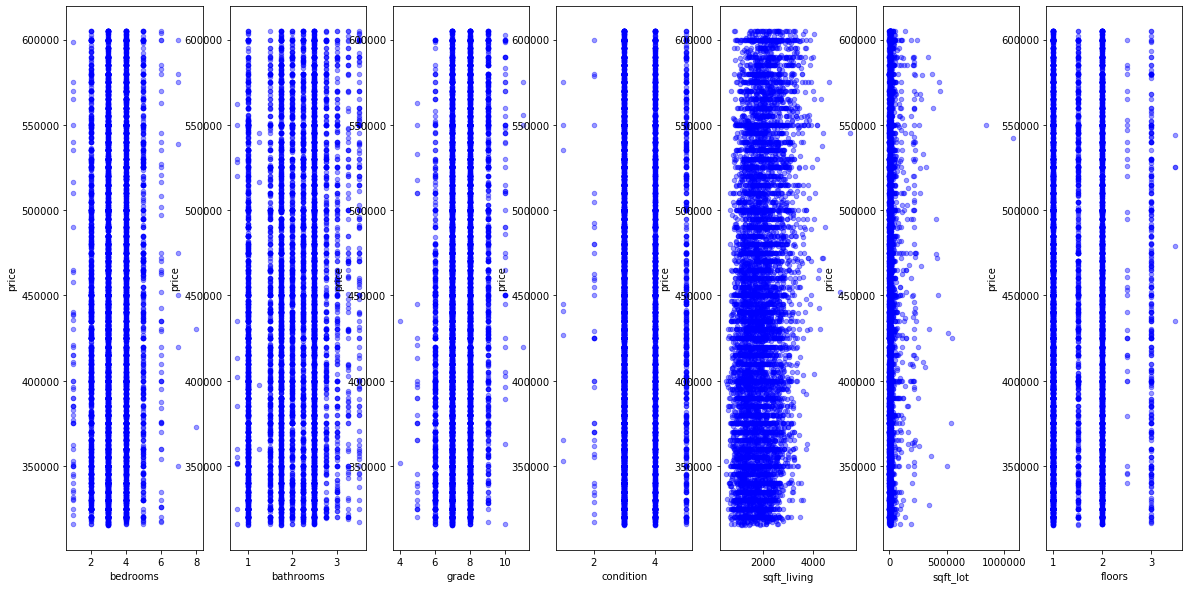

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 7, figsize = (20,10) )
for xcol, ax in zip(['bedrooms', 'bathrooms', 'grade', 'condition', 'sqft_living', 'sqft_lot', 'floors'], axes):
    train.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

In [29]:
train

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0.75,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5
5705,6001,464625.0,4,2.75,2040,8996,1.0,0.0,0.0,4,8,1260,780.0,1974,0.0,98033,2470,9180,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11719,12330,420000.0,3,2.25,2020,21010,2.0,0.0,0.0,3,7,2020,0.0,1995,0.0,98014,1850,18151,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1960,2061,510000.0,2,1.00,890,6095,1.0,0.0,0.0,3,7,890,0.0,1947,0.0,98115,1450,5985,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10040,10558,433000.0,4,2.50,2280,7568,2.0,0.0,0.0,4,7,2280,0.0,2001,0.0,98056,2280,5312,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17831,18769,419000.0,2,1.00,720,4592,1.0,0.0,0.0,4,6,720,0.0,1943,0.0,98199,1030,5816,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,4525,450000.0,4,1.50,1860,7808,1.0,0.0,0.0,3,7,1080,780.0,1953,0.0,98125,1530,7884,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13006,13678,405000.0,3,1.75,2020,8531,1.0,0.0,0.0,3,7,2020,0.0,1965,0.0,98011,1950,8449,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20386,21523,338500.0,3,2.25,1333,1470,3.0,0.0,3.0,3,7,1333,0.0,2009,0.0,98125,1360,1680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18011,18962,335000.0,4,2.25,3220,7889,2.0,0.0,0.0,3,8,3220,0.0,1978,0.0,98023,2120,7651,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


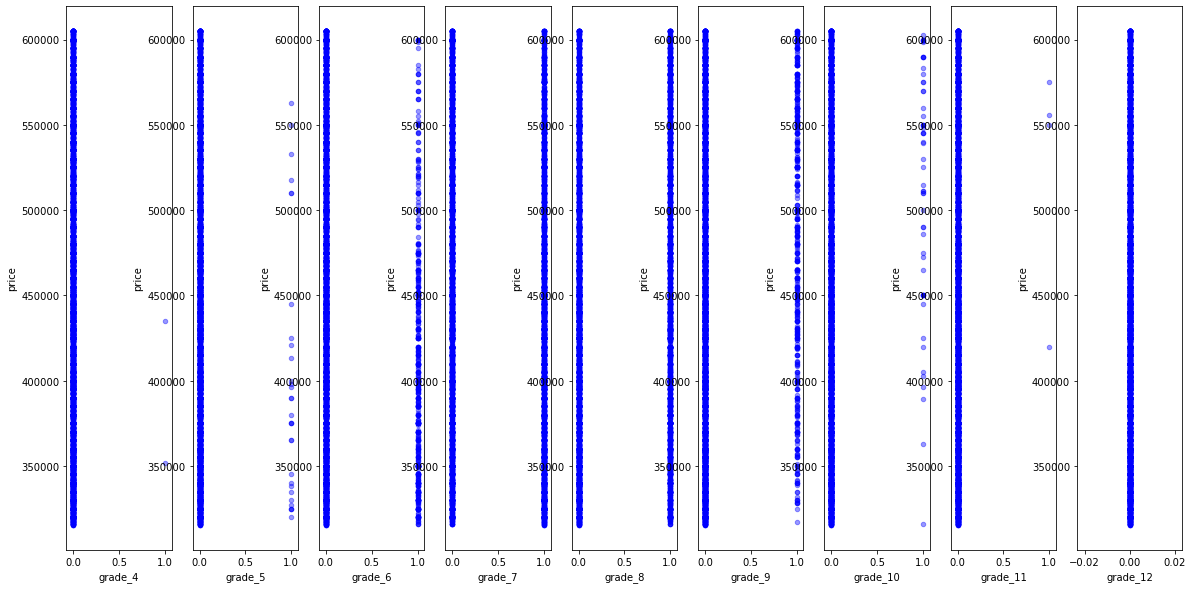

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 9, figsize = (20,10) )
for xcol, ax in zip(['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'], axes):
    train.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha = 0.4, color = 'b')

In [31]:
fgrade = 'price~grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12'
model = ols(formula=fgrade, data=train).fit()
model.summary() 

C:\Users\melfr\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\melfr\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     74.68
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          4.48e-105
Time:                        19:06:56   Log-Likelihood:                -97313.
No. Observations:                7662   AIC:                         1.946e+05
Df Residuals:                    7654   BIC:                         1.947e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.03e+05   7910.920     50.939      0.000    3.87e+05    4.18e+05
grade_4    -9476.2285   5.01e+04     -0.189      0.850   -1.08e+05    8.88e+04
grade_5    -2752.5511   1.49e+04     -0.185      0.853   -3.19e+04    2.64e+04
grade_6     5440.7296   8455.697      0.643      0.520   -1.11e+04     2.2e+04
grade_7     3.141e+04   7993.982      3.929      0.000    1.57e+04    4.71e+04
grade_8     5.816e+04   8023.568      7.248      0.000    4.24e+04    7.39e+04
grade_9     8.523e+04   8433.623     10.106      0.000    6.87e+04    1.02e+05
grade_10    1.127e+05   1.22e+04      9.244      0.000    8.88e+04    1.37e+05
grade_11    1.223e+05   3.59e+04      3.406      0.001    5.19e+04    1.93e+05
grade_12            0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1688.724   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.351
Skew:                           0.172   Prob(JB):                     8.36e-77
Kurtosis:                       2.010   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
df5 = df5.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', \
                                        'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', \
                                        'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', \
                                        'bath_3.0':'bath_3_0', 'bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [14]:
outcome = 'price'
predictors = train.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

NameError: name 'train' is not defined

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     32.29
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          3.79e-124
Time:                        19:06:56   Log-Likelihood:                -97240.
No. Observations:                7662   AIC:                         1.945e+05
Df Residuals:                    7640   BIC:                         1.947e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.608e+04   1.62e+04      5.324      0.000    5.44e+04    1.18e+05
bedrooms     941.7800   1213.006      0.776      0.438   -1436.045    3319.605
bathrooms   2.246e+04   5669.499      3.961      0.000    1.13e+04    3.36e+04
floors     -3064.5891   2071.733     -1.479      0.139   -7125.754     996.576
condition   1.133e+04   1535.875      7.379      0.000    8322.172    1.43e+04
grade       3.609e+04   3382.946     10.669      0.000    2.95e+04    4.27e+04
grade_4     7.834e+04   4.55e+04      1.722      0.085   -1.08e+04    1.68e+05
grade_5     4.769e+04    1.7e+04      2.807      0.005    1.44e+04     8.1e+04
grade_6     1.559e+04   1.06e+04      1.478      0.140   -5091.452    3.63e+04
grade_7     5754.7369   8776.298      0.656      0.512   -1.14e+04     2.3e+04
grade_8     1244.6568   8537.270      0.146      0.884   -1.55e+04     1.8e+04
grade_9    -5243.3760   9799.889     -0.535      0.593   -2.45e+04     1.4e+04
grade_10   -1.797e+04   1.37e+04     -1.315      0.189   -4.48e+04    8816.108
grade_11   -3.933e+04   2.68e+04     -1.469      0.142   -9.18e+04    1.32e+04
grade_12    4.353e-12   1.48e-11      0.294      0.769   -2.47e-11    3.34e-11
bath_0_75   2.938e+04   1.67e+04      1.764      0.078   -3276.718     6.2e+04
bath_1_0    2.507e+04   9594.250      2.613      0.009    6265.697    4.39e+04
bath_1_25   3.861e+04   3.12e+04      1.239      0.216   -2.25e+04    9.97e+04
bath_1_5    9809.1843   7462.281      1.315      0.189   -4818.934    2.44e+04
bath_1_75   1.623e+04   5922.171      2.741      0.006    4622.865    2.78e+04
bath_2_0    1.506e+04   5069.111      2.970      0.003    5119.305     2.5e+04
bath_2_25   2327.0734   4099.921      0.568      0.570   -5709.898    1.04e+04
bath_2_5   -1.244e+04   2953.684     -4.211      0.000   -1.82e+04   -6649.214
bath_2_75  -2167.1460   4324.539     -0.501      0.616   -1.06e+04    6310.138
bath_3_0   -1.142e+04   5215.626     -2.190      0.029   -2.16e+04   -1198.158
bath_3_25  -2.109e+04   7008.482     -3.009      0.003   -3.48e+04   -7352.671
bath_3_5   -3289.3190   7047.985     -0.467      0.641   -1.71e+04    1.05e+04
==============================================================================
Omnibus:                     1388.946   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.101
Skew:                           0.163   Prob(JB):                     6.91e-71
Kurtosis:                       2.048   Cond. No.                     2.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix 

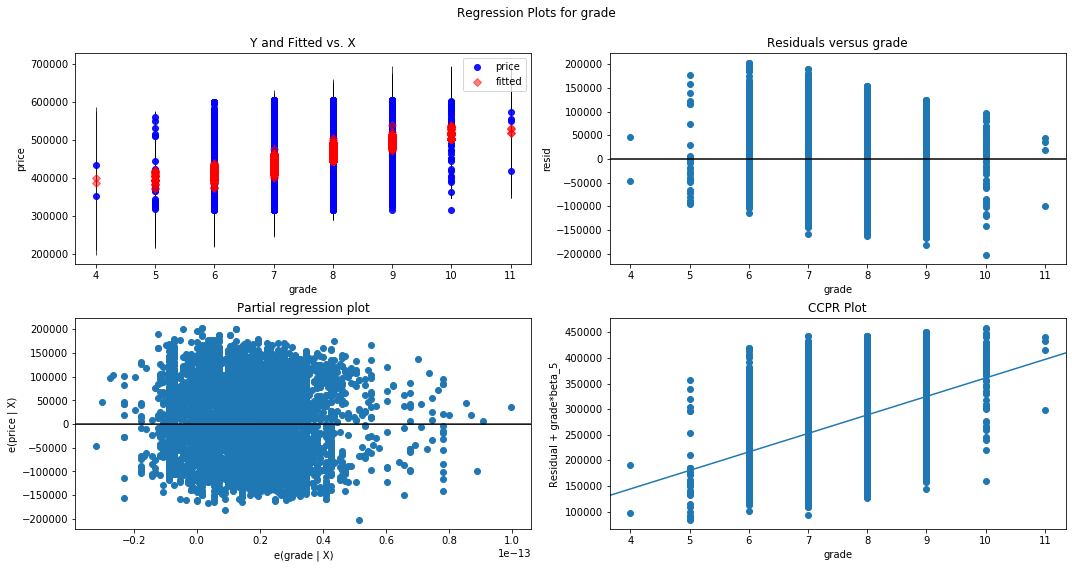

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

In [13]:
outcome = 'price'
predictors = df5.drop(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', \
                             'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df5).fit()

SyntaxError: invalid syntax (<unknown>, line 1)

In [25]:
df5

,Unnamed: 0,price,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,bath_0_75,bath_1_0,bath_1_25,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,cond_2,cond_3,cond_4,cond_5,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11
0,0,221900.0,1180,5650,1.0,0.0,0.0,1180,0.0,1955,0.0,98178,1340,5650,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5,257500.0,1715,6819,2.0,0.0,0.0,1715,0.0,1995,0.0,98003,2238,6819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,6,291850.0,1060,9711,1.0,0.0,0.0,1060,0.0,1963,0.0,98198,1650,9711,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,7,229500.0,1780,7470,1.0,0.0,0.0,1050,730.0,1960,0.0,98146,1780,8113,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,18,230000.0,1250,9774,1.0,0.0,0.0,1250,0.0,1969,0.0,98003,1280,8850,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,20396,249000.0,1260,1125,2.0,0.0,0.0,810,450.0,2011,0.0,98106,1260,1172,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4375,20404,305000.0,1590,2656,2.0,0.0,0.0,1220,370.0,2009,0.0,98106,1590,2306,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4376,20415,230000.0,1140,1201,2.0,0.0,0.0,1140,0.0,2014,0.0,98108,1210,1552,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4377,20427,270000.0,1870,5000,2.0,0.0,0.0,1870,0.0,2009,0.0,98042,2170,5399,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
f1 = 'price~grade_8+sqft_living+ sqft_living15+yr_built+bath_0_75+bath_1_0+bath_1_5+bath_1_75+bath_2_0'
model = ols(formula=f1, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 19 Nov 2020   Prob (F-statistic):          1.30e-174
Time:                        15:24:32   Log-Likelihood:                -52176.
No. Observations:                4379   AIC:                         1.044e+05
Df Residuals:                    4369   BIC:                         1.044e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8923.5000    7.6e+04      0.117      0.906    -1.4e+05    1.58e+05
grade_8        4530.0204   1795.618      2.523      0.012    1009.698    8050.343
sqft_living      16.7021      1.853      9.014      0.000      13.069      20.335
sqft_living15    11.4773      1.909      6.014      0.000       7.736      15.219
yr_built        106.4369     37.954      2.804      0.005      32.028     180.846
bath_0_75     -2.087e+04   7868.002     -2.652      0.008   -3.63e+04   -5440.924
bath_1_0      -1.306e+04   2350.307     -5.557      0.000   -1.77e+04   -8452.093
bath_1_5      -1.184e+04   2262.435     -5.235      0.000   -1.63e+04   -7409.135
bath_1_75     -8627.7724   1898.773     -4.544      0.000   -1.24e+04   -4905.214
bath_2_0      -9351.4377   2102.098     -4.449      0.000   -1.35e+04   -5230.260
==============================================================================
Omnibus:                       59.887   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.896
Skew:                          -0.209   Prob(JB):                     5.38e-12
Kurtosis:                       2.669   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

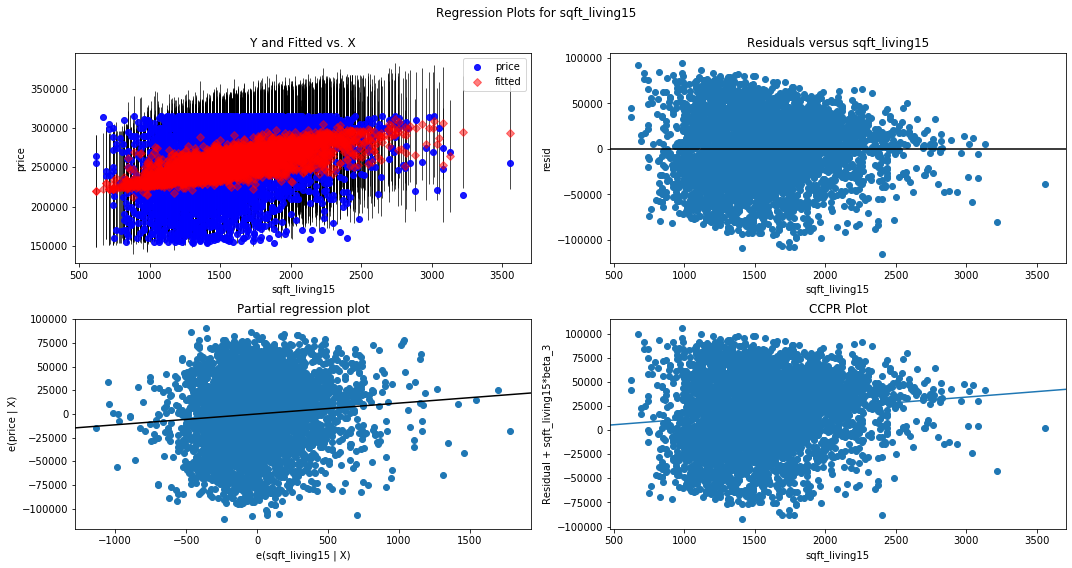

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

In [45]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [70]:
dumdf.describe()

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
dumdf= pd.get_dummies(df['bedrooms'], prefix='br')
dumdf = pd.concat([df, dumdf], axis=1)
dumdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,br_5,br_6,br_7,br_8,br_9,br_10,br_11,br_33
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,1,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,0,1,0,0,0,0,0,0,0,0,0


In [97]:
dumdf1= pd.get_dummies(df['bathrooms'], prefix='ba')
dumdf2 = pd.concat([dumdf, dumdf1], axis=1)
dumdf2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,br_5,br_6,br_7,br_8,br_9,br_10,br_11,br_33,ba_0.5,ba_0.75,ba_1.0,ba_1.25,ba_1.5,ba_1.75,ba_2.0,ba_2.25,ba_2.5,ba_2.75,ba_3.0,ba_3.25,ba_3.5,ba_3.75,ba_4.0,ba_4.25,ba_4.5,ba_4.75,ba_5.0,ba_5.25,ba_5.5,ba_5.75,ba_6.0,ba_6.25,ba_6.5,ba_6.75,ba_7.5,ba_7.75,ba_8.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
,'bedrooms_6','bedrooms_7','bedrooms_8','bedrooms_9','bedrooms_10','bedrooms_11','bedrooms_33', 'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75' , 'bathrooms_8.0'

In [99]:
dum1= dumdf2.drop(dumdf2.loc[dumdf2['br_6']==0].index, inplace=True)
dum1

In [100]:
dum1

In [101]:
dum1

In [124]:
df3['bedrooms'].value_counts()

3    9797
4    6784
2    2732
1     168
Name: bedrooms, dtype: int64

In [121]:
df1 = df.loc[df['bedrooms'] < 5]
df1['bedrooms'].value_counts()

3    9824
4    6882
2    2760
1     196
Name: bedrooms, dtype: int64

In [122]:
df2 = df1.loc[df1['bathrooms'] < 4.01]
df2['bathrooms'].value_counts()

2.50    5058
1.00    3801
1.75    2897
2.25    1913
2.00    1795
1.50    1389
2.75     934
3.50     539
3.00     536
3.25     446
3.75      95
0.75      71
4.00      69
1.25       9
0.50       4
Name: bathrooms, dtype: int64

In [123]:
df3 = df2.loc[df2['bathrooms'] > 0.99]
df3['bathrooms'].value_counts()

2.50    5058
1.00    3801
1.75    2897
2.25    1913
2.00    1795
1.50    1389
2.75     934
3.50     539
3.00     536
3.25     446
3.75      95
4.00      69
1.25       9
Name: bathrooms, dtype: int64

In [125]:
dumdf= pd.get_dummies(df3['bedrooms'], prefix='br')
dumdf = pd.concat([df3, dumdf], axis=1)
dumdf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1


In [126]:
dumdf1= pd.get_dummies(df3['bathrooms'], prefix='ba')
df4 = pd.concat([dumdf, dumdf1], axis=1)
df4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1.0,ba_1.25,ba_1.5,ba_1.75,ba_2.0,ba_2.25,ba_2.5,ba_2.75,ba_3.0,ba_3.25,ba_3.5,ba_3.75,ba_4.0
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [128]:
df4= df4.drop(['bedrooms', 'bathrooms'], axis=1)
df4

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1.0,ba_1.25,ba_1.5,ba_1.75,ba_2.0,ba_2.25,ba_2.5,ba_2.75,ba_3.0,ba_3.25,ba_3.5,ba_3.75,ba_4.0
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [140]:
f = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=f, data=df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     1651.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:25:59   Log-Likelihood:            -2.6458e+05
No. Observations:               19481   AIC:                         5.292e+05
Df Residuals:                   19462   BIC:                         5.293e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.528e+06   9.03e+04     50.140      0.000    4.35e+06    4.71e+06
grade        1.316e+05   2027.776     64.906      0.000    1.28e+05    1.36e+05
sqft_living   148.2291      3.234     45.831      0.000     141.890     154.569
yr_built    -3395.8593     61.402    -55.306      0.000   -3516.212   -3275.507
br_1          1.18e+06   2.53e+04     46.691      0.000    1.13e+06    1.23e+06
br_2         1.165e+06   2.31e+04     50.550      0.000    1.12e+06    1.21e+06
br_3         1.109e+06   2.31e+04     48.042      0.000    1.06e+06    1.15e+06
br_4         1.074e+06    2.3e+04     46.783      0.000    1.03e+06    1.12e+06
ba_1_0       2.513e+05   8324.996     30.189      0.000    2.35e+05    2.68e+05
ba_1_25      4.032e+05   5.98e+04      6.742      0.000    2.86e+05     5.2e+05
ba_1_5       2.575e+05   9404.367     27.384      0.000    2.39e+05    2.76e+05
ba_1_75      2.607e+05   8738.747     29.832      0.000    2.44e+05    2.78e+05
ba_2_0       2.692e+05   9169.462     29.360      0.000    2.51e+05    2.87e+05
ba_2_25      2.855e+05   9692.963     29.459      0.000    2.67e+05    3.05e+05
ba_2_5       2.709e+05   9816.816     27.600      0.000    2.52e+05     2.9e+05
ba_2_75      2.919e+05   1.07e+04     27.374      0.000    2.71e+05    3.13e+05
ba_3_0       3.213e+05   1.17e+04     27.348      0.000    2.98e+05    3.44e+05
ba_3_25       4.45e+05   1.28e+04     34.808      0.000     4.2e+05     4.7e+05
ba_3_5       3.968e+05   1.27e+04     31.307      0.000    3.72e+05    4.22e+05
ba_3_75      5.387e+05   2.07e+04     26.057      0.000    4.98e+05    5.79e+05
ba_4_0       5.364e+05   2.38e+04     22.543      0.000     4.9e+05    5.83e+05
==============================================================================
Omnibus:                    10858.406   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230437.674
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      19.242   Cond. No.                     3.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [136]:
df4 = df4.rename(columns={'ba_1.0':'ba_1_0', 'ba_1.25':'ba_1_25', 'ba_1.5':'ba_1_5', 'ba_1.75':'ba_1_75', \
                          'ba_2.0':'ba_2_0', 'ba_2.25':'ba_2_25', 'ba_2.5':'ba_2_5', 'ba_2.75':'ba_2_75', \
                          'ba_3.0':'ba_3_0', 'ba_3.25':'ba_3_25', 'ba_3.5':'ba_3_5', 'ba_3.75':'ba_3_75', \
                          'ba_4.0':'ba_4_0'})

In [137]:
df4

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [139]:
df4.describe()

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
count,1.948100e+04,1.948100e+04,19481.000000,1.948100e+04,19481.000000,17329.000000,19425.000000,19481.000000,19481.000000,19481.000000,19481.000000,16007.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000,19481.000000
mean,4.593858e+09,5.098874e+05,1968.641548,1.473268e+04,1.483728,0.006463,0.208443,3.406088,7.592834,1716.301987,1970.901134,79.545824,98078.563369,47.558364,-122.214704,1939.333453,12580.671115,0.008624,0.140239,0.502900,0.348237,0.195113,0.000462,0.071300,0.148709,0.092141,0.098198,0.259638,0.047944,0.027514,0.022894,0.027668,0.004877,0.003542
std,2.882831e+09,3.043255e+05,799.035773,4.077017e+04,0.542346,0.080136,0.721986,0.648503,1.113487,749.367637,29.250216,390.442988,53.442970,0.140340,0.142126,647.320134,26892.361295,0.092465,0.347244,0.500004,0.476424,0.396298,0.021490,0.257332,0.355811,0.289232,0.297590,0.438447,0.213654,0.163580,0.149570,0.164024,0.069664,0.059410
min,1.200019e+06,7.800000e+04,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.126049e+09,3.150000e+05,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,0.000000,98033.000000,47.463800,-122.331000,1470.000000,5040.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904911e+09,4.399500e+05,1830.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,1975.000000,0.000000,98070.000000,47.570200,-122.234000,1800.000000,7528.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.338001e+09,6.160000e+05,2410.000000,1.039200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2110.000000,1996.000000,0.000000,98118.000000,47.679100,-122.124000,2300.000000,9940.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,4.490000e+06,7850.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
id,1.000000,-0.013167,-0.002750,-0.133133,0.023549,-0.007566,0.011032,-0.026711,0.017403,-0.000409,0.026212,-0.015468,-0.009788,0.002020,0.021890,0.000341,-0.143669,-0.014635,0.007335,-0.020349,0.018850,-0.023677,-0.012557,-0.003331,-0.004776,-0.000314,-0.008211,0.039409,-0.000069,0.008647,-0.006488,-0.000978,-0.024925,-0.017969
price,-0.013167,1.000000,0.665178,0.092517,0.245683,0.259748,0.376882,0.045204,0.658499,0.559601,0.043579,0.126906,-0.030173,0.343333,0.024126,0.586743,0.084532,-0.055312,-0.142857,-0.147916,0.270095,-0.266691,0.007904,-0.092593,-0.078536,-0.057262,0.016003,0.078548,0.105594,0.109812,0.227641,0.239363,0.166585,0.155074
sqft_living,-0.002750,0.665178,1.000000,0.171700,0.349002,0.094961,0.246074,-0.065153,0.754778,0.870696,0.339677,0.042508,-0.205714,0.034453,0.265856,0.766061,0.187680,-0.122331,-0.366697,-0.206962,0.508217,-0.490151,-0.011922,-0.154477,-0.106126,-0.082368,0.035066,0.284177,0.180939,0.144095,0.212023,0.286527,0.152997,0.155020
sqft_lot,-0.133133,0.092517,0.171700,1.000000,-0.012142,0.023641,0.073600,-0.013736,0.109382,0.182139,0.054633,0.005005,-0.129295,-0.090236,0.228171,0.149972,0.717262,0.002892,-0.026492,-0.008901,0.028089,-0.040415,-0.005320,-0.025063,0.003188,-0.003812,-0.005662,-0.000332,0.015962,0.031325,0.036508,0.037186,0.035174,0.030885
floors,0.023549,0.245683,0.349002,-0.012142,1.000000,0.013619,0.011495,-0.268672,0.454435,0.514327,0.510361,-0.006712,-0.061319,0.048795,0.122689,0.268376,-0.017656,-0.053503,-0.130307,-0.063811,0.172328,-0.342178,0.016061,-0.068929,-0.264653,-0.114962,0.079875,0.414560,0.029327,0.093289,0.143816,0.150771,0.055090,0.055162
waterfront,-0.007566,0.259748,0.094961,0.023641,0.013619,1.000000,0.403372,0.013858,0.082321,0.056096,-0.026843,0.079035,0.037334,-0.016703,-0.042721,0.083230,0.032763,0.015888,0.019377,-0.006073,-0.010804,-0.021425,0.031791,-0.016744,0.002532,-0.018261,-0.006803,-0.003950,0.019466,0.021999,0.055735,0.012429,0.015588,0.019289
view,0.011032,0.376882,0.246074,0.073600,0.011495,0.403372,1.000000,0.043759,0.217968,0.126629,-0.067273,0.097340,0.098269,0.000847,-0.086804,0.253050,0.068819,0.003836,-0.018315,-0.030410,0.044519,-0.077941,0.023605,-0.033491,0.001532,-0.019350,-0.011434,-0.015708,0.064764,0.049445,0.085053,0.081464,0.048242,0.049880
condition,-0.026711,0.045204,-0.065153,-0.013736,-0.268672,0.013858,0.043759,1.000000,-0.153621,-0.164159,-0.359148,-0.061256,0.002483,-0.015659,-0.102980,-0.095990,-0.006478,-0.019881,-0.018792,0.014495,0.002343,0.037444,0.001272,0.029514,0.126936,0.084315,0.011479,-0.185236,0.028793,-0.009999,-0.040813,-0.070403,-0.008611,-0.008021
grade,0.017403,0.658499,0.754778,0.109382,0.454435,0.082321,0.217968,-0.153621,1.000000,0.743207,0.459606,0.006556,-0.179866,0.110044,0.204862,0.701823,0.117590,-0.110486,-0.257120,-0.109538,0.323807,-0.457232,0.007862,-0.114561,-0.125352,-0.096138,0.060869,0.301827,0.118096,0.108575,0.211941,0.250847,0.128838,0.128891
sqft_above,-0.000409,0.559601,0.870696,0.182139,0.514327,0.056096,0.126629,-0.164159,0.743207,1.000000,0.444908,0.009832,-0.275632,-0.019948,0.370324,0.737979,0.196473,-0.107151,-0.326636,-0.178756,0.446470,-0.412767,-0.013410,-0.141251,-0.176928,-0.102259,0.005610,0.365291,0.124788,0.111223,0.182872,0.248973,0.140340,0.136226


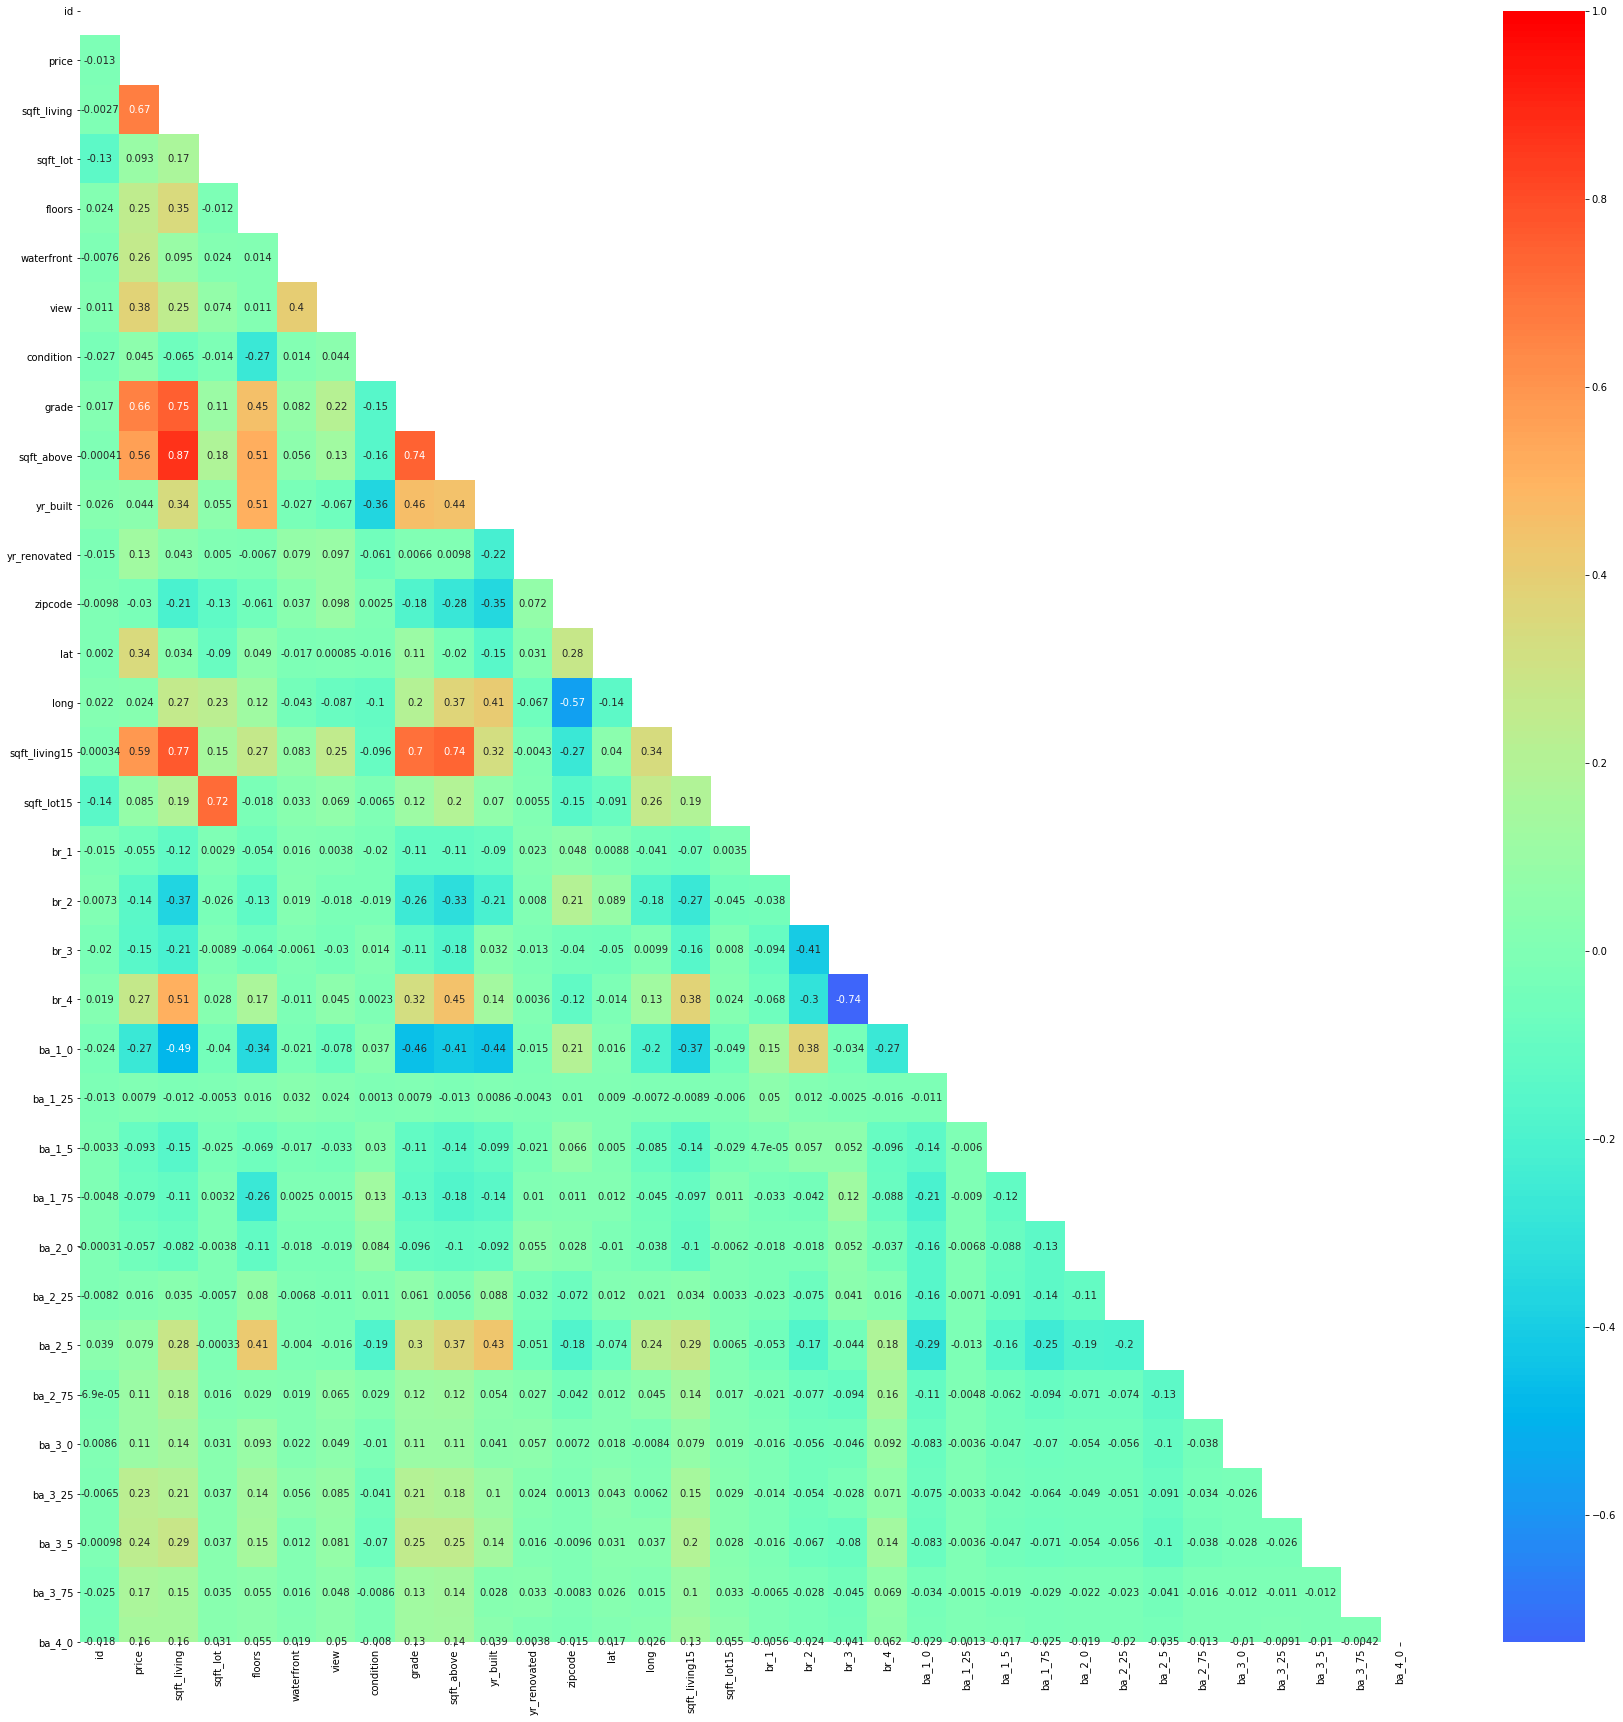

In [157]:
corr = df4.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

In [159]:
df4

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,3510,7200,2.0,0.0,0.0,3,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [160]:
df5 = df4[(df4['price']< 800000) & (df4['price']> 315000)]
df5

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,br_1,br_2,br_3,br_4,ba_1_0,ba_1_25,ba_1_5,ba_1_75,ba_2_0,ba_2_25,ba_2_5,ba_2_75,ba_3_0,ba_3_25,ba_3_5,ba_3_75,ba_4_0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,3793500160,3/12/2015,323000.0,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,1736800520,4/3/2015,662500.0,3560,9796,1.0,NaN,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,3448900210,10/14/2014,610685.0,2520,6023,2.0,0.0,NaN,3,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
21591,2997800021,2/19/2015,475000.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21592,263000018,5/21/2014,360000.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21593,6600060120,2/23/2015,400000.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [161]:
ff = 'price~grade+sqft_living+yr_built+br_1+br_2+br_3+br_4+ba_1_0+ba_1_25+ba_1_5+ba_1_75+ba_2_0+ba_2_25+ba_2_5+ba_2_75+ba_3_0+ba_3_25+ba_3_5+ba_3_75+ba_4_0'
model = ols(formula=ff, data=df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     333.5
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:56:03   Log-Likelihood:            -1.5975e+05
No. Observations:               12302   AIC:                         3.195e+05
Df Residuals:                   12283   BIC:                         3.197e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.553e+06   6.45e+04     39.592      0.000    2.43e+06    2.68e+06
grade        6.476e+04   1516.995     42.687      0.000    6.18e+04    6.77e+04
sqft_living    50.4958      2.303     21.924      0.000      45.981      55.010
yr_built    -1754.4644     44.343    -39.566      0.000   -1841.384   -1667.545
br_1         6.505e+05   1.87e+04     34.714      0.000    6.14e+05    6.87e+05
br_2         6.491e+05   1.65e+04     39.296      0.000    6.17e+05    6.81e+05
br_3         6.321e+05   1.64e+04     38.479      0.000       6e+05    6.64e+05
br_4         6.216e+05   1.63e+04     38.049      0.000     5.9e+05    6.54e+05
ba_1_0       1.568e+05   6136.397     25.558      0.000    1.45e+05    1.69e+05
ba_1_25      1.841e+05   4.06e+04      4.540      0.000    1.05e+05    2.64e+05
ba_1_5       1.713e+05   6932.418     24.705      0.000    1.58e+05    1.85e+05
ba_1_75      1.793e+05   6419.937     27.925      0.000    1.67e+05    1.92e+05
ba_2_0       1.842e+05   6690.951     27.522      0.000    1.71e+05    1.97e+05
ba_2_25      1.867e+05   7182.840     25.998      0.000    1.73e+05    2.01e+05
ba_2_5       1.915e+05   7295.330     26.249      0.000    1.77e+05    2.06e+05
ba_2_75      2.056e+05   7786.689     26.404      0.000     1.9e+05    2.21e+05
ba_3_0       1.993e+05   8660.343     23.017      0.000    1.82e+05    2.16e+05
ba_3_25      2.174e+05   9919.458     21.912      0.000    1.98e+05    2.37e+05
ba_3_5       2.411e+05   9648.617     24.985      0.000    2.22e+05     2.6e+05
ba_3_75      1.838e+05   2.69e+04      6.842      0.000    1.31e+05    2.36e+05
ba_4_0       2.522e+05   2.35e+04     10.737      0.000    2.06e+05    2.98e+05
==============================================================================
Omnibus:                      144.836   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.872
Skew:                           0.253   Prob(JB):                     2.11e-32
Kurtosis:                       2.828   Cond. No.                     1.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [162]:
df4.to_csv(r'C:\Users\melfr\Documents\Flatiron\p2\PhaseProject\KingHousing\data\meldf.csv')